# Assignment 2

**Dataset**: Iris Dataset (kaggle),  containing 3 different species of iris flower \
https://www.kaggle.com/datasets/arshid/iris-flower-dataset


**Tasks**:
1.   Classify the data using 1-NN method. Build three classifiers using OAA aproach (M1).
2.   Show accuracy of your model.
3.   Build 1-NN model without using classifier provided by the python library. Compute the euclidean distance to find the nearest neighbor (M2). Compare the accuracy of M1 and M2.
4. Build KNN model for classification using OAA technique for multi classification problem.
5. Try diffrent values of hyperparameters to observe and optimize results.
6. Write your observations after each exercise.

In [74]:
# Loading the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

iris = pd.read_csv(r'iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [75]:
iris.shape

(150, 5)

In [76]:
iris.info()  # To check the datatype and missing values

# iris.isnull().values.any()     # Tells if null values are present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [77]:
print(iris['species'].unique())  # 3 classes of species
iris['species'].value_counts()  # how many samples of each class variable present

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [78]:
iris['species'] = iris['species'].map(
    {'Iris-setosa': 0, 
     'Iris-versicolor': 1, 
     'Iris-virginica': 2})

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [79]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


### Data Visualization

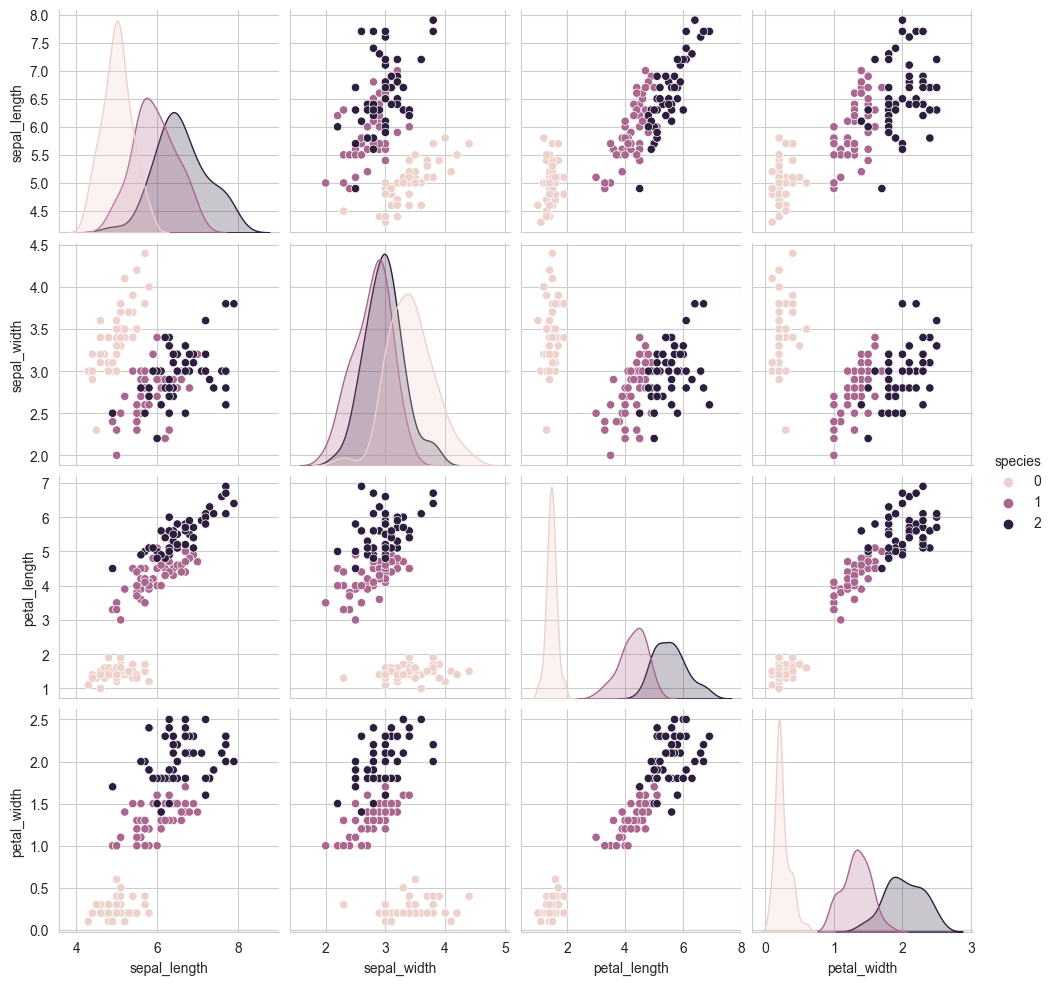

In [83]:
sns.set_style('whitegrid');
sns.pairplot(iris, hue='species');
plt.show()

**Observation**
1. Setosa can be identified easily, but Virnica and Versicolor have some overlap.
2. Most important parameters are length and width

### Normalization and Splitting the dataset

Splitting the dataset in 70-30, train-test proportion

In [28]:
x = iris.drop('species', axis=1)
y = iris.species

print(x.shape,'\n',y.shape)

(150, 4) 
 (150,)


In [118]:
from sklearn import preprocessing

MinMaxScalar = preprocessing.MinMaxScaler()
xMM = MinMaxScalar.fit_transform(x)

data = pd.DataFrame(xMM,columns=list(x.columns) )
data.tail()

,sepal_length,sepal_width,petal_length,petal_width
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667
149,0.444444,0.416667,0.694915,0.708333


In [123]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

xTrain, xTest, yTrain, yTest = train_test_split(
    x, y, test_size=0.3, random_state=1)

print(xTrain.shape, yTrain.shape, xTest.shape, yTest.shape, sep='\n')
xTrain

(105, 4)
(105,)
(45, 4)
(45,)


,sepal_length,sepal_width,petal_length,petal_width
118,7.7,2.6,6.9,2.3
18,5.7,3.8,1.7,0.3
4,5.0,3.6,1.4,0.2
45,4.8,3.0,1.4,0.3
59,5.2,2.7,3.9,1.4
...,...,...,...,...
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
72,6.3,2.5,4.9,1.5
140,6.7,3.1,5.6,2.4


## KNN

1NN model

In [120]:
# Creating the model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')
knn.fit(xTrain, yTrain)

print('Accuracy on Train: {}'.format(knn.score(xTrain, yTrain)))
print('Accuracy on Test: {}'.format( knn.score(xTest, yTest)))

Accuracy on Train: 1.0
Accuracy on Test: 0.9777777777777777


In [121]:
# Checking and evaluating the model 

yPred = knn.predict(xTest)
result = confusion_matrix(yTest, yPred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(yTest, yPred)
print("Classification Report: ")
print (result1)
result2 = accuracy_score(yTest,yPred)
print("Accuracy:",result2)

Confusion Matrix:
[[14  0  0]
 [ 0 18  0]
 [ 0  1 12]]
Classification Report: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.95      1.00      0.97        18
 Iris-virginica       1.00      0.92      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.98        45
   weighted avg       0.98      0.98      0.98        45

Accuracy: 0.9777777777777777
